# Imports

In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt

# Definition of dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

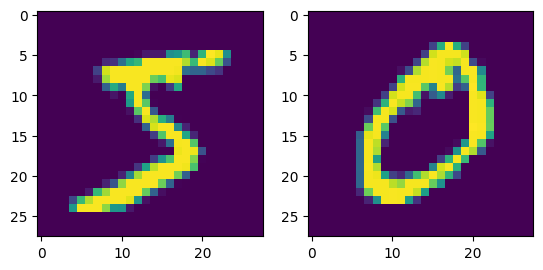

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.subplot(1, 2, 2)
plt.imshow(X_train[1])
plt.show()

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Preprocessing

In [6]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

X_train, X_test

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


# Defining model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Conv2D(),
    tf.keras.layers.Dense(10),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training model

In [10]:
model.fit(X_train, y_train, shuffle=True, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 508us/step - loss: 2.5802 - accuracy: 0.3972
Epoch 2/30
1875/1875 [==============================] - 1s 515us/step - loss: 1.4863 - accuracy: 0.6123
Epoch 3/30
1875/1875 [==============================] - 1s 507us/step - loss: 1.2858 - accuracy: 0.6853
Epoch 4/30
1875/1875 [==============================] - 1s 502us/step - loss: 1.1545 - accuracy: 0.7263
Epoch 5/30
1875/1875 [==============================] - 1s 505us/step - loss: 1.0699 - accuracy: 0.7605
Epoch 6/30
1875/1875 [==============================] - 1s 511us/step - loss: 0.9771 - accuracy: 0.7886
Epoch 7/30
1875/1875 [==============================] - 1s 512us/step - loss: 0.9160 - accuracy: 0.8055
Epoch 8/30
1875/1875 [==============================] - 1s 516us/step - loss: 0.8943 - accuracy: 0.8187
Epoch 9/30
1875/1875 [==============================] - 1s 508us/step - loss: 0.8395 - accuracy: 0.8380
Epoch 10/30
1875/1875 [==============================] - 1s 510u

# Evaluation

In [11]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 1s 398us/step - loss: 1.9862 - accuracy: 0.6980


[1.9862234592437744, 0.698033332824707]